# Data flow pipeline checkup

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from glob import glob
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

import shutil

# Project
project_common_path = os.path.dirname('.')
project_common_path = os.path.abspath(os.path.join(project_common_path, '..'))
if not project_common_path in sys.path:
    sys.path.append(project_common_path)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [4]:
os.environ['THEANO_FLAGS'] = 'device=cpu'

from common.data_utils import train_ids
from common.xy_providers import XYProvider

In [5]:
train_id_type_list = [(image_id, "Train") for image_id in train_ids]

In [6]:
from common.image_utils import get_image_data

def get_x_data(image_id, image_type, **kwargs):
    img = get_image_data(image_id, image_type, **kwargs)
    return img

def get_y_data(image_id, image_type, **kwargs):
    mask = get_image_data(image_id, image_type + '_mask', **kwargs)
    return mask[:, :, None]

(1280, 1918, 3) (1280, 1918, 1) ('e114fcbb9723_14', 'Train')
(1280, 1918, 3) (1280, 1918, 1) ('bb7625a3f1d4_09', 'Train')
(1280, 1918, 3) (1280, 1918, 1) ('a7b9e343cf6b_05', 'Train')
(1280, 1918, 3) (1280, 1918, 1) ('d8f11603ef08_01', 'Train')
(1280, 1918, 3) (1280, 1918, 1) ('0ed6904e1004_07', 'Train')
(1280, 1918, 3) (1280, 1918, 1) ('2cb91c2543fa_06', 'Train')
(1280, 1918, 3) (1280, 1918, 1) ('4e7bc95552ed_15', 'Train')


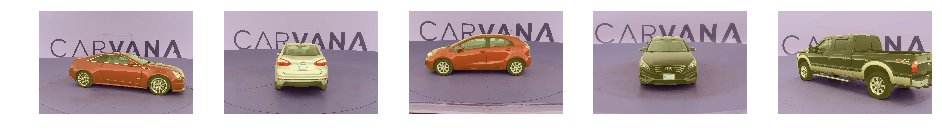

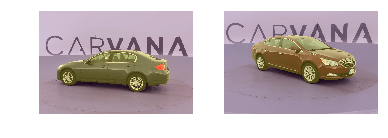

In [7]:

xy_provider = XYProvider(get_x_data=get_x_data, get_y_data=get_y_data, seed=2017)

loop_max_counter = 7
counter = 0
for x, y, data_id in xy_provider(train_id_type_list, test_mode=False, with_y=True):
    
    print(x.shape, y.shape, data_id)
    n = 5
    if counter % n == 0:
        plt.figure(figsize=(16, 16))

    plt.subplot(1, n, (counter % n) + 1)
    plt.imshow(x)
    plt.imshow(y[:, :, 0], alpha=0.25)
    plt.axis('off')

    counter += 1    
    loop_max_counter -= 1
    if loop_max_counter == 0:
        break
    

In [10]:
from common.batch_generator import BatchGenerator

In [11]:
seed = 2017

In [15]:
batch_size = 5
xy_provider = XYProvider(get_x_data=get_x_data, get_y_data=get_y_data, seed=seed)

train_batch_gen = BatchGenerator(batch_size=batch_size,
                                 xy_provider=xy_provider,
                                 phase=BatchGenerator.TRAINING, 
                                 seed=seed)

In [13]:
from common.image_utils import scale_percentile

(5, 1280, 1918, 3) (5, 1280, 1918, 1)
(5, 1280, 1918, 3) (5, 1280, 1918, 1)
(5, 1280, 1918, 3) (5, 1280, 1918, 1)
(5, 1280, 1918, 3) (5, 1280, 1918, 1)
(5, 1280, 1918, 3) (5, 1280, 1918, 1)
(5, 1280, 1918, 3) (5, 1280, 1918, 1)
(5, 1280, 1918, 3) (5, 1280, 1918, 1)


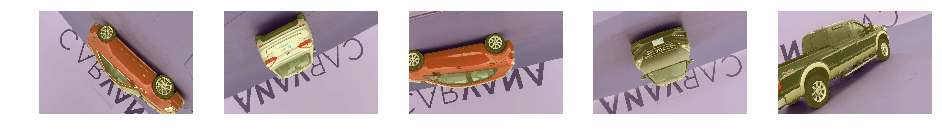

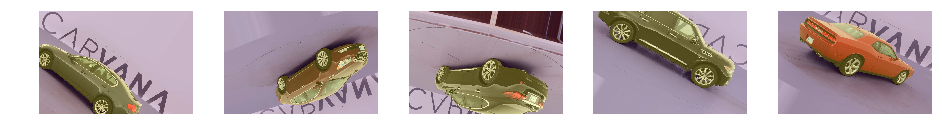

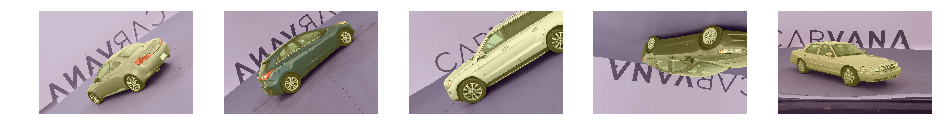

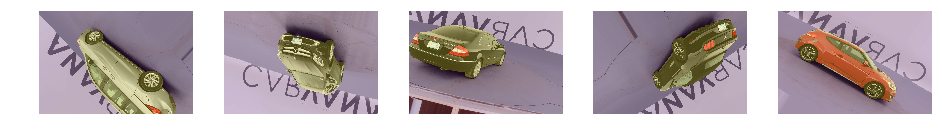

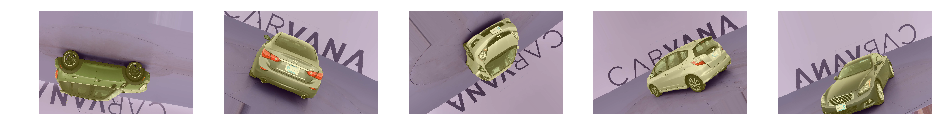

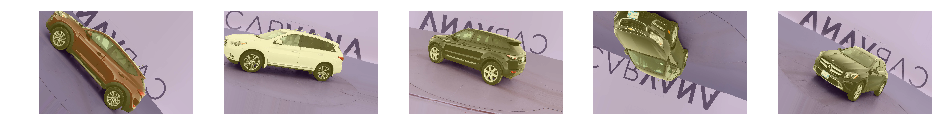

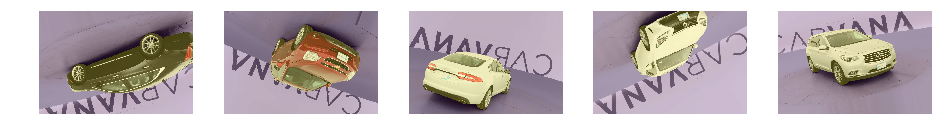

In [16]:

loop_max_counter = 7
counter = 0
for x, y, _ in train_batch_gen(train_id_type_list):
    
    print(x.shape, y.shape)
    n = 5    
    for counter in range(batch_size):
        if counter % n == 0:
            plt.figure(figsize=(16, 16))
        plt.subplot(1, n, counter % n + 1)
        img = x[counter, :, :, :]
        mask = y[counter, :, :, 0]
                        
        plt.imshow(scale_percentile(img, q_min=0.0, q_max=100.0))
        plt.imshow(mask, alpha=0.25)
        plt.axis('off')
    
    loop_max_counter -= 1
    if loop_max_counter == 0:
        break
    